In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
sns.set(style="whitegrid")
df = pd.read_csv('events.csv',low_memory = False)
df.tail()


,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
1011283,2018-06-11 12:31:49,checkout,ffffa8d1,NaN,8512.0,Samsung Galaxy S7 Edge,Muito Bom,32GB,Preto,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011284,2018-06-04 23:18:03,visited site,ffffac8a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Unknown,Unknown,Brazil,Smartphone,320x534,Android 6,Chrome Mobile 39
1011285,2018-06-04 23:18:03,ad campaign hit,ffffac8a,/comprar/samsung/galaxy-s7-edge,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011286,2018-06-04 23:18:03,viewed product,ffffac8a,NaN,8527.0,Samsung Galaxy S7 Edge,Bom,32GB,Prata,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011287,2018-06-04 23:18:10,checkout,ffffac8a,NaN,8527.0,Samsung Galaxy S7 Edge,Bom,32GB,Prata,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.isnull().sum()

timestamp                         0
event                             0
person                            0
url                          928532
sku                          447450
model                        447004
condition                    447452
storage                      447452
color                        447452
skus                         789589
search_term                  962321
staticpage                  1007690
campaign_source              928492
search_engine                960331
channel                      923910
new_vs_returning             923910
city                         923910
region                       923910
country                      923910
device_type                  923910
screen_resolution            923910
operating_system_version     923910
browser_version              923910
dtype: int64

In [12]:
df['event'].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [13]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].dt.month
only_channel = df.dropna(subset = ['channel'])
total_channel = df['channel'].size

Text(0,0.5,'Canales')

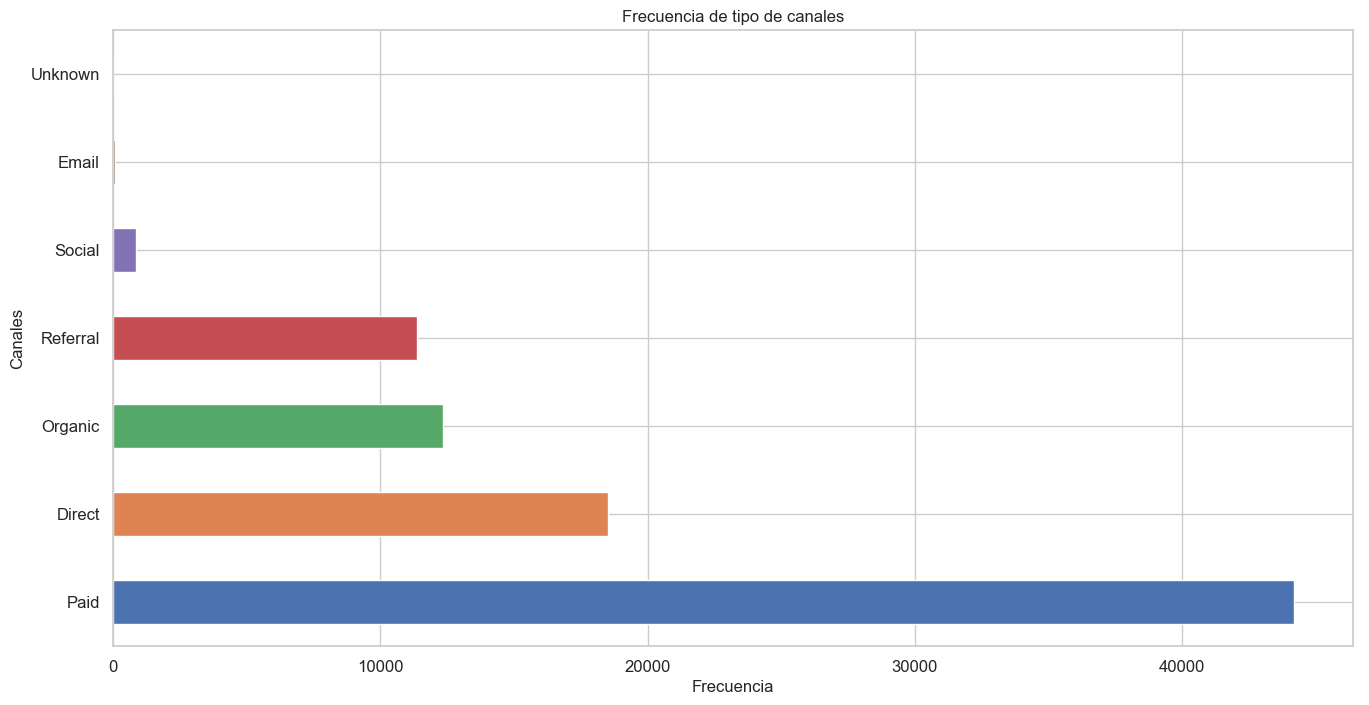

In [14]:
channels = only_channel['channel'].value_counts()
channels.plot(kind = 'barh', figsize = (16, 8), title = 'Frecuencia de tipo de canales', legend = False, fontsize = 12)
ax = plt.gca()
ax.set_xlabel("Frecuencia",fontsize = 12)
ax.set_ylabel("Canales", fontsize = 12)

Text(0,0.5,'Frecuencia')

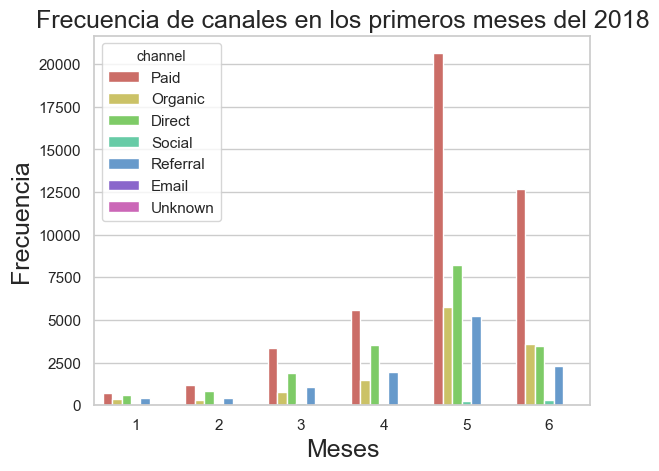

In [15]:
channel_month = only_channel.loc[:,['channel','month']]
plot = sns.countplot(x="month", hue="channel", data = channel_month, palette="hls")
plot.set_title("Frecuencia de canales en los primeros meses del 2018", fontsize=18)
plot.set_xlabel("Meses", fontsize=18)
plot.set_ylabel("Frecuencia", fontsize=18)


Text(0,0.5,'Frecuencia')

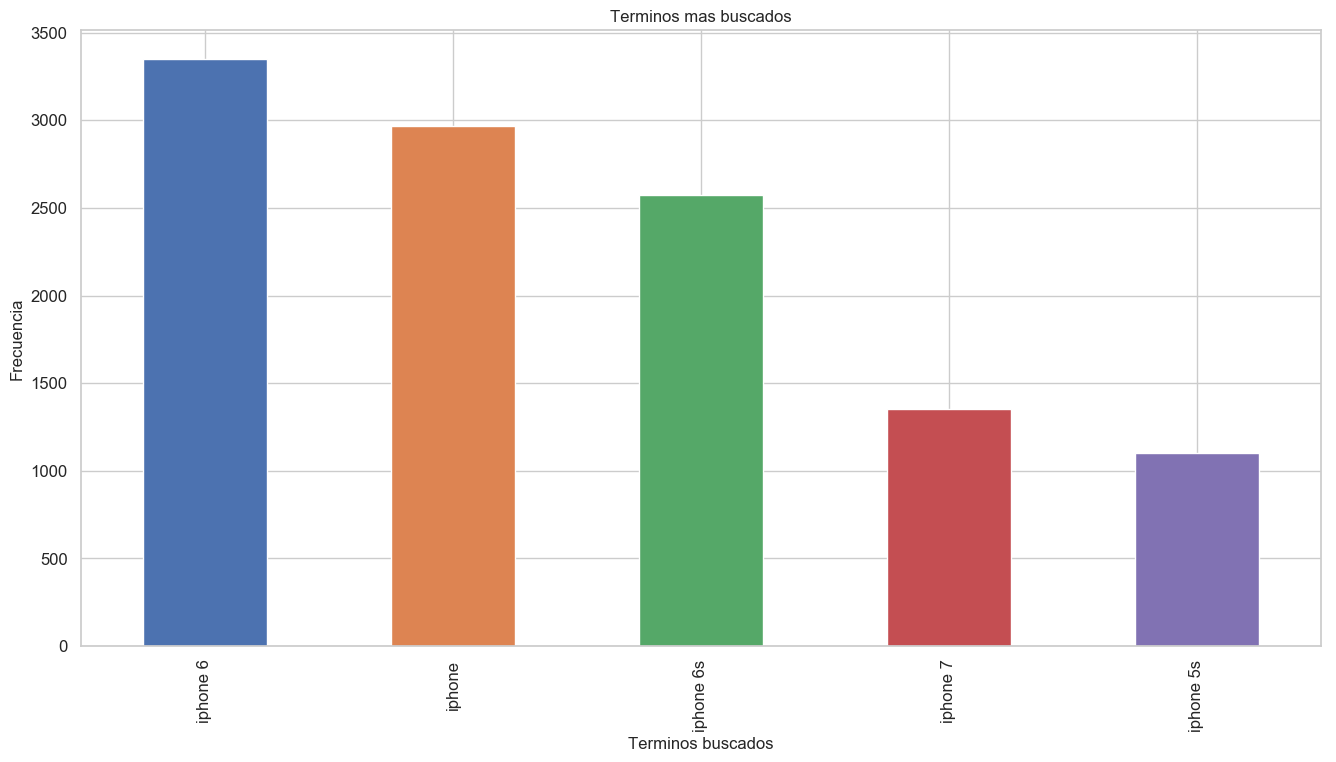

In [30]:
only_search = df.dropna(subset = ['search_term'])
lower = only_search['search_term'].str.lower()
search_term = lower.value_counts().head()
search_term.plot(kind = 'bar', figsize = (16, 8), title = 'Terminos mas buscados', legend = False, fontsize = 12)
ax = plt.gca()
ax.set_xlabel("Terminos buscados",fontsize = 12)
ax.set_ylabel("Frecuencia", fontsize = 12)

In [32]:
search_month = only_search.loc[:,['search_term','month']]
search_month['search_term'] = search_month['search_term'].str.lower()

Text(0,0.5,'Frecuencia de busqueda')

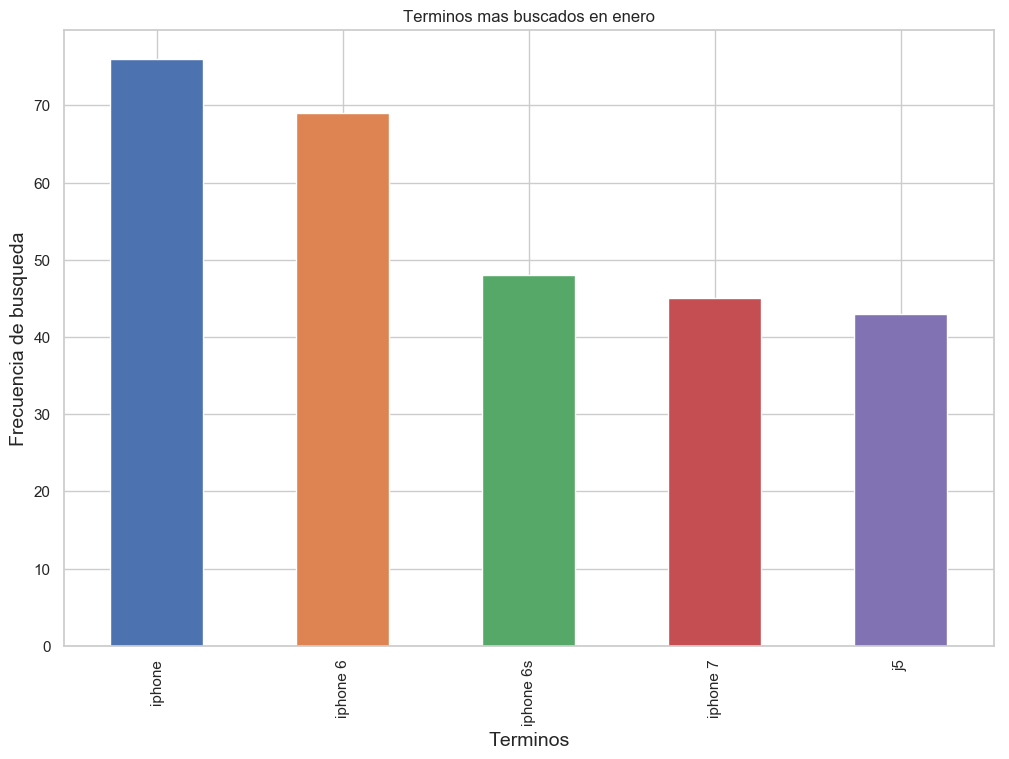

In [26]:
january =  search_month.loc[search_month['month']==1,:].groupby('search_term').size().sort_values(ascending=False).head(5).\
plot(kind='bar',title='Terminos mas buscados en enero',rot=90,figsize=(12,8))
january.set_xlabel("Terminos", fontsize=14)
january.set_ylabel("Frecuencia de busqueda", fontsize=14)

Text(0,0.5,'Frecuencia de busqueda')

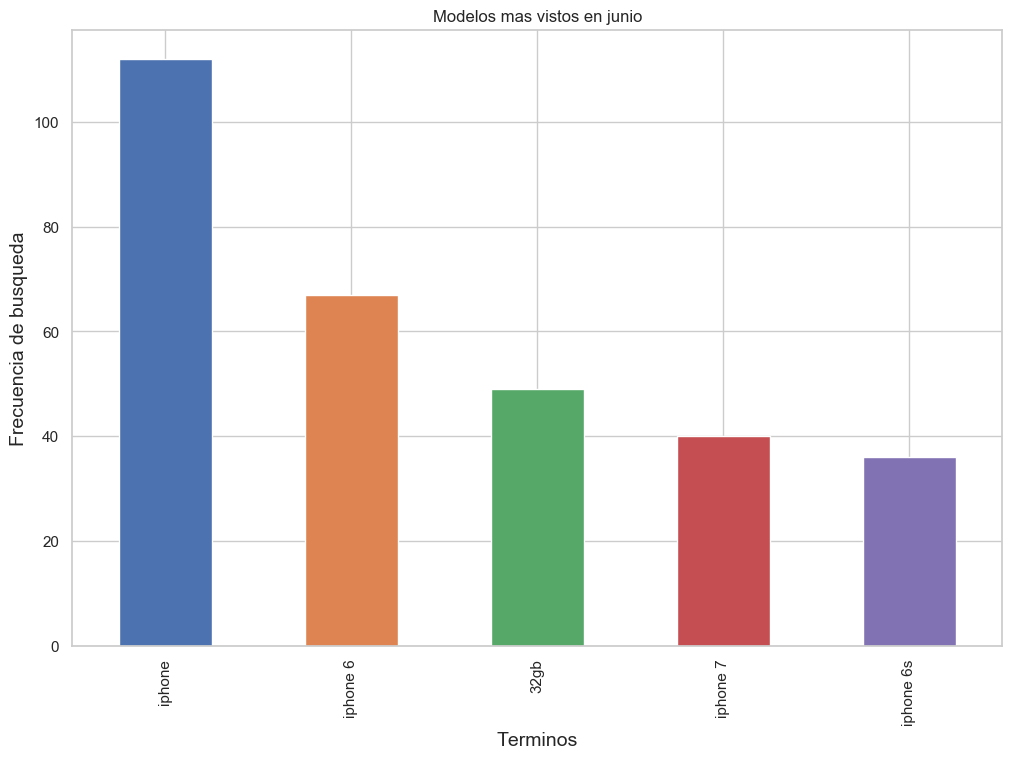

In [25]:
february = search_month.loc[search_month['month']==2,:].groupby('search_term').size().sort_values(ascending=False).head(5).\
plot(kind='bar',title='Terminos mas buscados en Febrero',rot=90,figsize=(12,8))
february.set_xlabel("Terminos", fontsize=14)
february.set_ylabel("Frecuencia de busqueda", fontsize=14)

Text(0,0.5,'Frecuencia de busqueda')

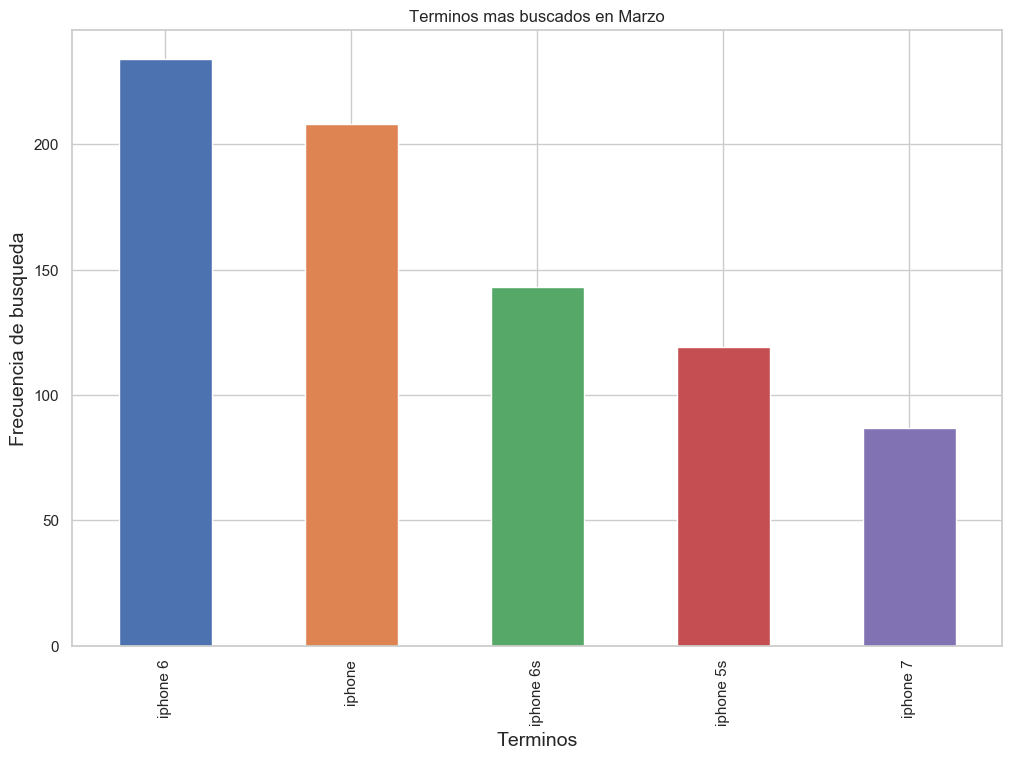

In [27]:
march = search_month.loc[search_month['month']==3,:].groupby('search_term').size().sort_values(ascending=False).head(5).\
plot(kind='bar',title='Terminos mas buscados en Marzo',rot=90,figsize=(12,8))
march.set_xlabel("Terminos", fontsize=14)
march.set_ylabel("Frecuencia de busqueda", fontsize=14)

Text(0,0.5,'Frecuencia de busqueda')

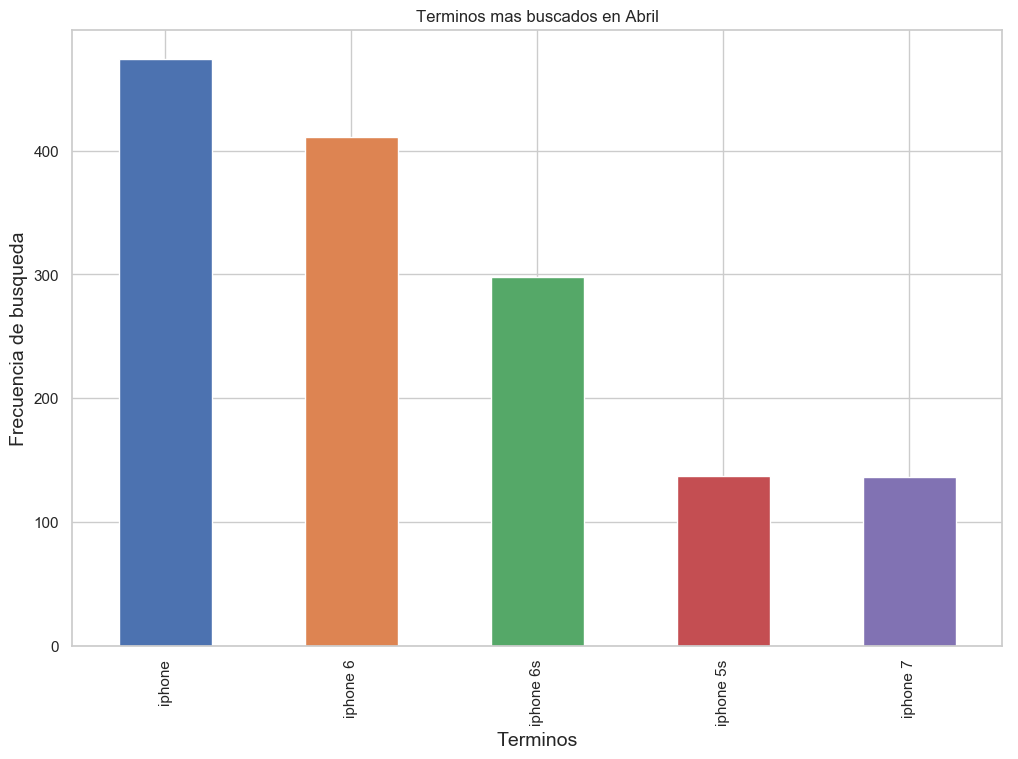

In [28]:
april = search_month.loc[search_month['month']==4,:].groupby('search_term').size().sort_values(ascending=False).head(5).\
plot(kind='bar',title='Terminos mas buscados en Abril',rot=90,figsize=(12,8))
april.set_xlabel("Terminos", fontsize=14)
april.set_ylabel("Frecuencia de busqueda", fontsize=14)

Text(0,0.5,'Frecuencia de busqueda')

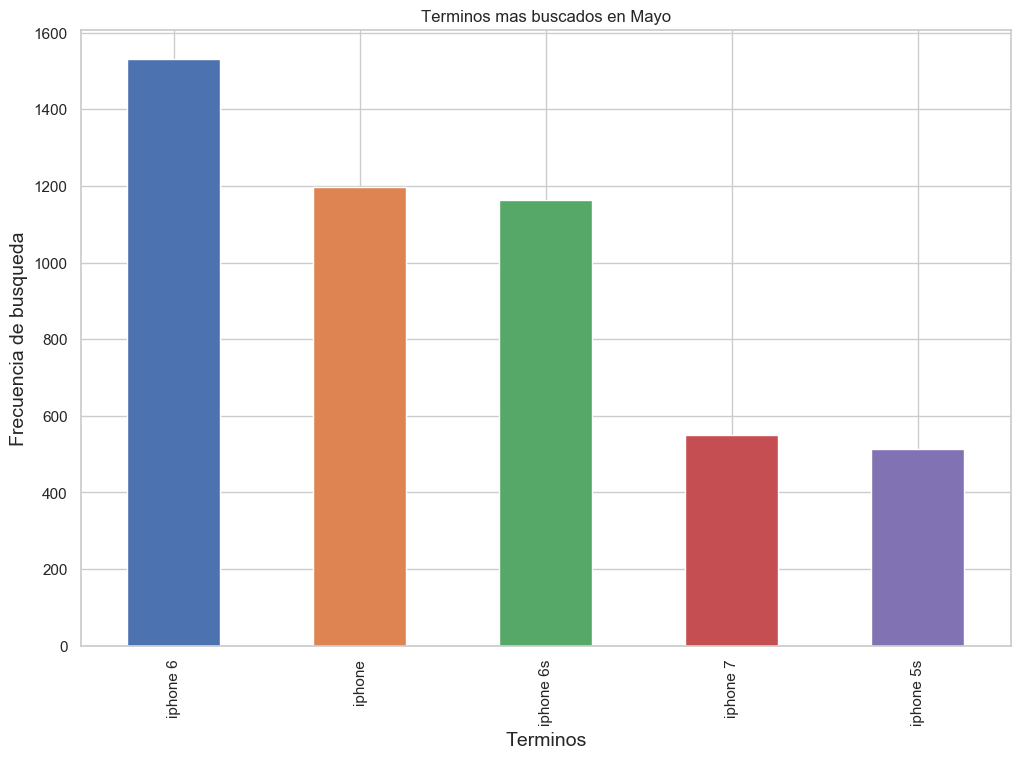

In [29]:
may = search_month.loc[search_month['month']==5,:].groupby('search_term').size().sort_values(ascending=False).head(5).\
plot(kind='bar',title='Terminos mas buscados en Mayo',rot=90,figsize=(12,8))
may.set_xlabel("Terminos", fontsize=14)
may.set_ylabel("Frecuencia de busqueda", fontsize=14)

Text(0,0.5,'Frecuencia de busqueda')

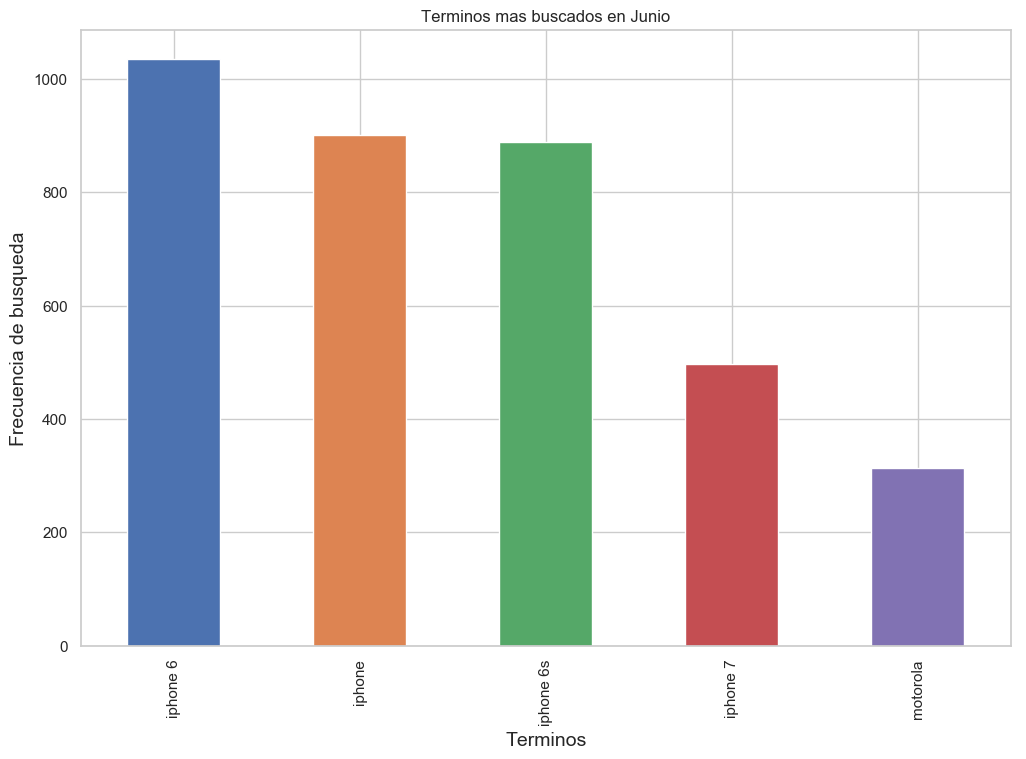

In [31]:
june = search_month.loc[search_month['month']==6,:].groupby('search_term').size().sort_values(ascending=False).head(5).\
plot(kind='bar',title='Terminos mas buscados en Junio',rot=90,figsize=(12,8))
june.set_xlabel("Terminos", fontsize=14)
june.set_ylabel("Frecuencia de busqueda", fontsize=14)